In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from ID_Transfer.IDTransfer_Utils import *
from tqdm import tqdm
from utils.vis_util import *

In [5]:
# Generate a straight-line movement for the target (that the attacker tries to transfer its ID with)
move_target = generate_move(start=(160, 360), end=(800,360), time=150)

In [ ]:
# Generate one adversarial trajectory that attacks the target movement
adv_traj = generate_traj(move_target)

In [ ]:
# Generate a various adversarial trajectories with random initial positions (attacker starts behind the target)
# (this could take a while, adjust total_num if needed)
count = 0
output = []
total_num = 100

while count <= 100:
    adv_traj = generate_traj(move_target, attacker_spawn_range=(0,480, 0, 360))
    if adv_traj is None:
        continue
    else:
        adv_x, adv_y = [], []
        for center in adv_traj:
            adv_x.append(center[0,0].numpy())
            adv_y.append(center[1,0].numpy())
        output.append([adv_x, adv_y])
    count += 1

output_np = np.array(output)
np.save('left_traj.npy', output_np)

In [ ]:
# Generate a various adversarial trajectories with random initial positions (attacker starts ahead of the target)
# (this could take a while, adjust total_num if needed)
count = 0
output_r = []
total_num = 100

while count <= total_num:
    adv_traj = generate_traj(move_target, attacker_spawn_range=(480,960, 0, 360))
    if adv_traj is None:
        continue
    else:
        adv_x, adv_y = [], []
        for center in adv_traj:
            adv_x.append(center[0,0].numpy())
            adv_y.append(center[1,0].numpy())
        output_r.append([adv_x, adv_y])
    count += 1
    print(count)

output_r_np = np.array(output_r)
np.save('right_traj.npy', output_r_np)

In [2]:
left_traj = np.load('left_traj.npy')
right_traj = np.load('right_traj.npy')
traj = np.concatenate([left_traj, right_traj], axis=0)

# Plot the adversarial trajectories

In [ ]:
np.random.seed(2022)
index = np.random.choice(101, 40, False)
fig, ax = plt.subplots()
for i in index:
    adv_x = moving_average(left_traj[i,0,:], 2)
    adv_y = moving_average(left_traj[i,1,:], 2)
    plt.plot(adv_x, adv_y, alpha=0.5, color='red')
    arrow(adv_x, adv_y, ax, 30)

for i in index:
    adv_x = moving_average(right_traj[i,0,:], 2)
    adv_y = moving_average(right_traj[i,1,:], 2)
    plt.plot(adv_x, adv_y, alpha=0.5, color='red')
    arrow(adv_x, adv_y, ax, 30)

plt.arrow(160,360,640,0, width=5, color='blue', zorder=0, alpha=0.5)
plt.gca().invert_yaxis()
plt.xlim(0,960)
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Adversarial Trajectories')
blue_patch = mpatches.Patch(color='blue', label='Target Trajectory')
plt.legend(handles=[red_patch, blue_patch], loc='upper left')

# Plot the pattern of trajectories

In [6]:
speeds = calculate_speed(traj)
distance = calculate_distance(traj, move_target)
velocity = calculate_velocity(traj) # Decompose into x and y speed

Text(0.5, 1.0, 'Speed and Distance (from Attacker to Target) vs Time')

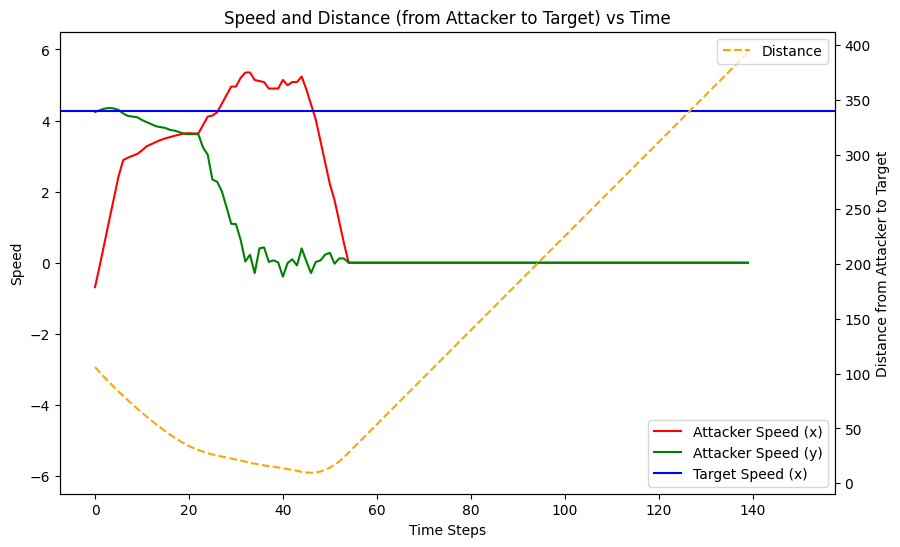

In [15]:
# Index for adv_traj generated that we want to plot the pattern for
i = 1

window_size = 10

n, t = 2, 149

smoothed_x_speed = moving_average(velocity[i, :, 0], window_size)
smoothed_y_speed = moving_average(velocity[i, :, 1], window_size)
smoothed_distance = moving_average(distance[i], window_size)
# Plotting
fig = plt.figure(figsize=(10, 6))

# First y-axis (left) for speed
ax1 = plt.gca()
adjusted_time_steps = range(0, t-window_size+1)
ax1.plot(adjusted_time_steps, smoothed_x_speed, label='Attacker Speed (x)', color='red')
ax1.plot(adjusted_time_steps, smoothed_y_speed, label='Attacker Speed (y)', color='green')
ax1.axline((0,4.26), (150, 4.26), label='Target Speed (x)', color='blue')

ax1.set_xlabel('Time Steps')
ax1.set_ylabel('Speed')
ax1.set_ylim(-6.5, 6.5)
ax1.tick_params(axis='y')
ax1.legend(loc='lower right')


# Second y-axis (right) for distance
ax2 = ax1.twinx()
ax2.plot(adjusted_time_steps, smoothed_distance, label='Distance', color='orange', linestyle='--')
ax2.set_ylabel('Distance from Attacker to Target')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Speed and Distance (from Attacker to Target) vs Time')